In [15]:
import cv2 as cv

from matplotlib.pyplot import imshow
%matplotlib inline

import pysight

###### Helpers

In [16]:
def cv2mpl(frame, color=False):
    if color:
        frame_corrected = cv.cvtColor(frame, color)
        return imshow(frame_corrected)
    else:
        return imshow(frame)
    
def crop_photo(frame, dim):
    x, y, w, h = dim
    return frame[y:y+h, x:x+w]

###### Classifiers

In [17]:
face_clf = cv.CascadeClassifier('pysight/models/haarcascade_frontalface_alt.xml')
eyes_clf = cv.CascadeClassifier('pysight/models/haarcascade_eye.xml')

Preprocessing

In [18]:
test_img = cv.imread('test.png')
print ("orig dim:\t{}".format(test_img.shape))

test_img_proc_scale = pysight.Camera().process(test_img, 2)
test_img_proc_nscale = pysight.Camera().process(test_img, 1)

print ("proc scale dim:\t{}".format(test_img_proc_scale.shape))
print ("proc NO scale dim:\t{}".format(test_img_proc_nscale.shape))

orig dim:	(378, 669, 3)
proc scale dim:	(189, 334)
proc NO scale dim:	(378, 669)


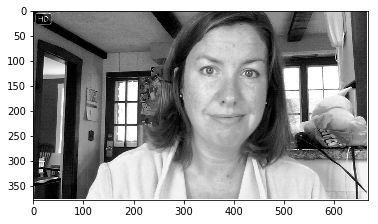

In [21]:
# Regular image
#cv2mpl(test_img, cv.COLOR_BGR2RGB) 

# Greyscale image
cv2mpl(test_img_proc_nscale, cv.COLOR_GRAY2RGB)

Test our face classifier

[[289  41 207 207]]


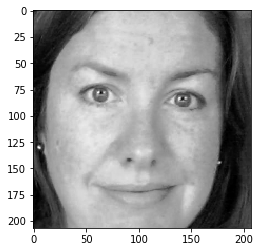

In [30]:
faces = face_clf.detectMultiScale(test_img_proc_nscale, scaleFactor=1.03, minNeighbors=5, flags=0, minSize=(30, 30))
print (faces)

test_face = crop_photo(test_img_proc_nscale, faces[0])
cv2mpl(test_face, cv.COLOR_GRAY2RGB)

Eyes Classifier

In [36]:
eyes = eyes_clf.detectMultiScale(test_face, 1.1, 2, 0, (30, 30))
print (eyes)

[[ 36  54  51  51]
 [118  60  50  50]]


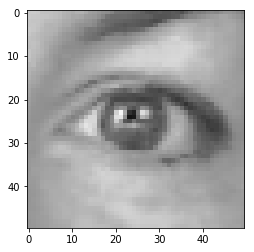

In [35]:
cv2mpl(crop_photo(test_face, eyes[1]),  cv.COLOR_GRAY2RGB)

In [37]:
for eye in eyes:
    print (eye)

[36 54 51 51]
[118  60  50  50]


In [38]:
def get_left_eye(eyes):
    """Helper function to get the left eye.
    Eyes: n * [x, y, w, h] for each eye detected in photo."""
    left_idx, left_val = -1, float('inf')
    
    for idx, val in enumerate(eyes):
        if val[0] < left_val:
            left_val = val[0]
            left_idx = idx
    
    return eyes[left_idx]

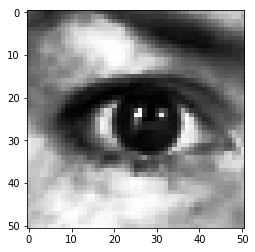

In [42]:
left = get_left_eye(eyes)
l_eye = crop_photo(test_face, left)
l_eye = cv.equalizeHist(l_eye)
cv2mpl(l_eye, cv.COLOR_GRAY2RGB)

Pupils

In [44]:
?cv.HoughCircles

In [49]:
#circles = cv.HoughCircles(l_eye, cv.HOUGH_GRADIENT, 1, eye.cols/8, 250, 15, eye.rows/8, eye.rows/3)
eye_height, eye_width = l_eye.shape[:2]
circles = cv.HoughCircles(l_eye, cv.HOUGH_GRADIENT, 1, eye_width//8, 250, 15, eye_height//8, eye_height//3)
print (circles)

[[[ 25.5         35.5         21.78302002]
  [ 23.5         19.5         18.56071091]
  [ 25.5         43.5         21.96588135]
  [ 32.5          2.5         29.6057415 ]
  [ 32.5         33.5         18.56071091]
  [ 17.5         35.5         18.66815376]
  [ 28.5         25.5         18.56071091]
  [ 32.5         40.5         17.67766762]
  [ 21.5         48.5         19.60867119]
  [ 30.5         10.5         21.96588135]
  [ 34.5         18.5         17.67766762]
  [ 12.5         20.5         19.65960312]
  [ 15.5         29.5         19.60867119]
  [ 15.5         47.5         17.67766762]
  [ 41.5          1.5         18.82816887]
  [ 17.5          6.5         17.56416702]
  [ 18.5         15.5         20.70024109]
  [ 20.5         25.5         17.67766762]
  [ 36.5          8.5         26.08639336]
  [  3.5         20.5         25.34758186]
  [ 38.5         38.5         17.67766762]
  [ 47.5          1.5         21.22498512]
  [  7.5         26.5         23.11925316]
  [  5.5   

In [51]:
circles[0][0]

array([ 25.5       ,  35.5       ,  21.78302002], dtype=float32)